# Data visualization about US

### Adrian Cabrera, Martí Rivero, Gerard Garcia

#### February 25, 2021

## Importing the dataset

### Explaining the dataset, the data and references

This dataset contains various indicators of health related to diseases, safe living conditions, deaths, births …

The data is organized in states and the 3141 counties of the United States with more than 200 variables in total.

This dataset is not designed only for healthcare professionals but for anyone who wants to do research or improve their community References

[Dataset official webpage](https://healthdata.gov/dataset/community-health-status-indicators-chsi-combat-obesity-heart-disease-and-cancer).

In [2]:
# Required libraries
import pandas as pd
import numpy as np
import re
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib as plt

In [3]:
# Data import
na_list = ["-1111.1", "-1111", "-1", "-2222", "-2222.2", "-2"]
demographics_raw = pd.read_csv('chsi_dataset/DEMOGRAPHICS.csv', na_values = na_list)
measures_of_birth_and_death_raw = pd.read_csv('chsi_dataset/MEASURESOFBIRTHANDDEATH.csv', na_values = na_list)
risk_factors_and_access_to_care_raw = pd.read_csv('chsi_dataset/RISKFACTORSANDACCESSTOCARE.csv', na_values = na_list)
leading_causes_of_death_raw = pd.read_csv('chsi_dataset/LEADINGCAUSESOFDEATH.csv', na_values = na_list)
vulnerable_pops_and_env_health_raw = pd.read_csv('chsi_dataset/VUNERABLEPOPSANDENVHEALTH.csv', na_values = na_list)
preventive_services_use_raw = pd.read_csv('chsi_dataset/PREVENTIVESERVICESUSE.csv', na_values = na_list)
us_long_lat_state = pd.read_csv('chsi_dataset/statelatlong.csv')

demographics_na = demographics_raw.isna().sum().sum()
measures_of_birth_and_death_na = measures_of_birth_and_death_raw.isna().sum().sum()
risk_factors_and_access_to_care_na = risk_factors_and_access_to_care_raw.isna().sum().sum()
leading_causes_of_death_na = leading_causes_of_death_raw.isna().sum().sum()
vulnerable_pops_and_env_health_na = vulnerable_pops_and_env_health_raw.isna().sum().sum()
preventive_services_use_na = preventive_services_use_raw.isna().sum().sum()

In [4]:
# tidy
pattern = "Ind|Max|Min|CI"
cols_demographics = list(demographics_raw.columns)
cols_measures_of_birth_and_death = list(measures_of_birth_and_death_raw.columns)
cols_risk_factors_and_access_to_care = list(risk_factors_and_access_to_care_raw.columns)
cols_leading_causes_of_death = list(leading_causes_of_death_raw.columns)
cols_vulnerable_pops_and_env_health = list(vulnerable_pops_and_env_health_raw.columns)
cols_preventive_services_use = list(preventive_services_use_raw.columns)

demographics_target_columns = [x for i, x in enumerate(cols_demographics) if not bool(re.search(pattern, x))]
measures_of_birth_and_death_target_columns = [x for i, x in enumerate(cols_measures_of_birth_and_death) if not bool(re.search(pattern, x))]
risk_factors_and_access_to_care_target_columns = [x for i, x in enumerate(cols_risk_factors_and_access_to_care) if not bool(re.search(pattern, x))]
leading_causes_of_death_target_columns = [x for i, x in enumerate(cols_leading_causes_of_death) if not bool(re.search(pattern, x))]
vulnerable_pops_and_env_health_target_columns = [x for i, x in enumerate(cols_vulnerable_pops_and_env_health) if not bool(re.search(pattern, x))]
preventive_services_use_target_columns = [x for i, x in enumerate(cols_preventive_services_use) if not bool(re.search(pattern, x))]

demographics_tidy = demographics_raw[demographics_target_columns]
measures_of_birth_and_death_tidy = measures_of_birth_and_death_raw[measures_of_birth_and_death_target_columns]
risk_factors_and_access_to_care_tidy = risk_factors_and_access_to_care_raw[risk_factors_and_access_to_care_target_columns]
leading_causes_of_death_tidy = leading_causes_of_death_raw[leading_causes_of_death_target_columns]
vulnerable_pops_and_env_health_tidy = vulnerable_pops_and_env_health_raw[vulnerable_pops_and_env_health_target_columns]
preventive_services_use_tidy = preventive_services_use_raw[preventive_services_use_target_columns]

## Tables

### DEMOGRAPHICS

#### Columns

| Name                | Data Type     | Description                       |  
|---------------------|---------------|-----------------------------------|          
| `State_FIPS_Code`   | Text          |Two-digit state identifier         |                               
| `County_FIPS_Code`  | Text          |Three-digit county identifier      |                
| `CHSI_County_Name`  | Text          |Name of county                     |             
| `CHSI_State_Name`   | Text         |Name of State or District of Columbia| 
| `Population_Size`   |Integer        |County data, population size|
| `Poverty`   |Decimal        |County data, individuals living below poverty level|
| `White`   |Decimal        |County data, White|
| `Black`   |Decimal        |County data, Black|
| `Native_American`|Decimal        |County data, American Indian|
| `Asian`|Decimal        |County data, Asian/Pacific Islander|
| `Hispanic`|Decimal        |County data,Hispanic origin|

In [6]:
print("Number of rows: ",len(demographics_raw.index))
print("Number of NA: ",demographics_raw.isna().sum().sum())

Number of rows:  3141
Number of NA:  4


### MEASURESOFBIRTHANDDEATH

#### Columns

| Name                | Data Type     | Description                       |  
|---------------------|---------------|-----------------------------------|          
| `State_FIPS_Code`   | Text          |Two-digit state identifier         |                               
| `County_FIPS_Code`  | Text          |Three-digit county identifier      |                
| `CHSI_County_Name`  | Text          |Name of county                     |             
| `CHSI_State_Name`   | Text         |Name of State or District of Columbia| 
| `Infant_Mortality`   | Decimal         |County data, infant mortality|
| `Lung_Cancer`   | Decimal         |County data, death measures, lung cancer|
| `Suicide`   | Decimal         |County data, death measures, suicide|
| `MOBD_Time_Span`   | Text         |Time period of reported data for measures of birth and death|


In [7]:
print("Number of rows: ",len(measures_of_birth_and_death_raw.index))
print("Number of NA: ",measures_of_birth_and_death_raw.isna().sum().sum())

Number of rows:  3141
Number of NA:  41500


### VULNETABLEPOPSANDENVHEALTH

#### Columns

| Name                | Data Type     | Description                       |  
|---------------------|---------------|-----------------------------------|          
| `State_FIPS_Code`   | Text          |Two-digit state identifier         |                            
| `County_FIPS_Code`  | Text          |Three-digit county identifier      |                
| `CHSI_County_Name`  | Text          |Name of county                     |             
| `CHSI_State_Name`   | Text         |Name of State or District of Columbia| 
| `Unemployed`   | Text              |County data, unemployed|

In [8]:
print("Number of rows: ",len(vulnerable_pops_and_env_health_raw.index))
print("Number of NA: ",vulnerable_pops_and_env_health_raw.isna().sum().sum())

Number of rows:  3141
Number of NA:  792


### PREVENTIVESERVICESUSE

#### Columns

| Name                | Data Type     | Description                       |  
|---------------------|---------------|-----------------------------------|          
| `State_FIPS_Code`   | Text          |Two-digit state identifier         |                            
| `County_FIPS_Code`  | Text          |Three-digit county identifier      |                
| `CHSI_County_Name`  | Text          |Name of county                     |             
| `CHSI_State_Name`   | Text         |Name of State or District of Columbia| 
| `HepA_Rpt`   | Integer         |County data, Hepatitis A reported cases|
| `HepB_Rpt`   | Integer         |County data, Hepatitis B reported cases|

In [9]:
print("Number of rows: ",len(preventive_services_use_raw.index))
print("Number of NA: ",preventive_services_use_raw.isna().sum().sum())

Number of rows:  3141
Number of NA:  32739


### RISKFACTORSANDACCESSTOCARE

#### Columns

| Name                | Data Type     | Description                       |  
|---------------------|---------------|-----------------------------------|          
| `State_FIPS_Code`   | Text          |Two-digit state identifier         |                            
| `County_FIPS_Code`  | Text          |Three-digit county identifier      |                
| `CHSI_County_Name`  | Text          |Name of county                     |             
| `CHSI_State_Name`   | Text         |Name of State or District of Columbia|
| `Obesity`   | Decimal         |County data,obesity|
| `Smoker`   | Decimal         |County data,smoker| 
| `Uninsured`   | Integer         |County data,uninsured individuals| 

In [10]:
print("Number of rows: ",len(risk_factors_and_access_to_care_raw.index))
print("Number of NA: ",risk_factors_and_access_to_care_raw.isna().sum().sum())

Number of rows:  3141
Number of NA:  18079


## N/A Information

In the dataset we have found a report that explains how the NAs are indicated. According to the table we have found multiple values that we converted to NA during import. We indicate these values in the following relationship: (values - additional information)

- 9999 - For unenployed variable.
- 2222, -2222.2, -2 OR nda - No data available
- 1111, -1111.1, -1 OR nrf - No report

## Tidying the dataset

No, the dataset was not cleant. We had to delete colums related to intervals, quantiles, percentiles that we did not require in our case. We used regular expressions patterns, selects and filters to tidy the data as needed.

In some situations we had to convert the data to long format. We invested and found the function pivot_longer() but we could not make use of it since is still in the maturation phrase and it is not included in the tidyverse standard, only in the development version, then we find the function gather with which achieved that change.

## The plots

### Exercise 3

Plot which of the most populated states has the gratest infantil mortality.

Result: We can see that texas is the state with the highest growth.

array([<AxesSubplot:title={'center':'1994-2003'}, xlabel='CHSI_State_Name'>,
       <AxesSubplot:title={'center':'1999-2003'}, xlabel='CHSI_State_Name'>,
       <AxesSubplot:title={'center':'2001-2003'}, xlabel='CHSI_State_Name'>],
      dtype=object)

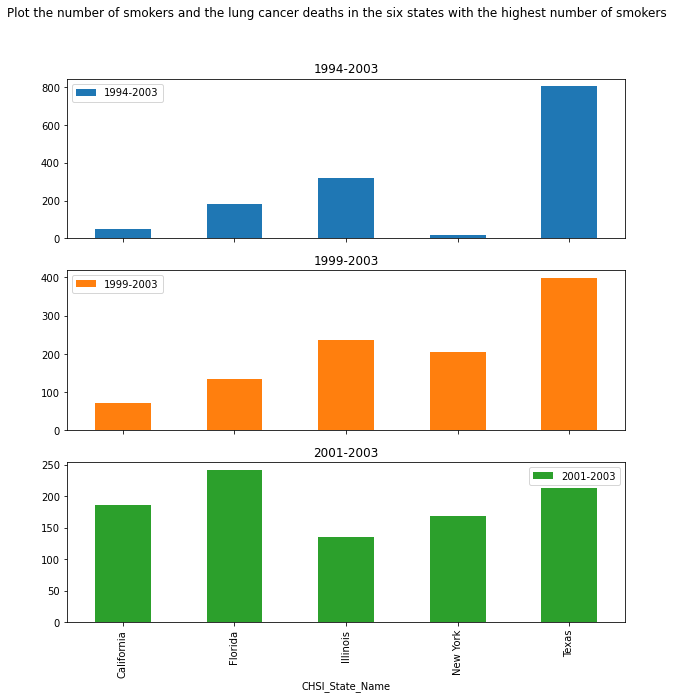

In [11]:
states_infant_mortality_tidy = measures_of_birth_and_death_tidy.groupby(['CHSI_State_Name', 'MOBD_Time_Span']).agg({"Infant_Mortality":"sum"}).dropna().reset_index()
population = demographics_tidy.groupby('CHSI_State_Name').agg({"Population_Size":"sum"}).reset_index()
more_populated_state = population.sort_values(by=["Population_Size"], ascending=False).head()
more_populated_state_names = more_populated_state['CHSI_State_Name'].to_list()
infant_mortality_in_state = states_infant_mortality_tidy.loc[states_infant_mortality_tidy['CHSI_State_Name'].isin(more_populated_state_names)]#.set_index('CHSI_State_Name')
infant_mortality_in_state.pivot(index='CHSI_State_Name',columns='MOBD_Time_Span',values='Infant_Mortality').plot.bar(title="Plot the number of smokers and the lung cancer deaths in the six states with the highest number of smokers", subplots=True, figsize=(10,10))

### Exercise 4

Plot the number of smokers and the lung cancer deaths in the six states with the highest number of smokers.

Result: We cannot arrive at indications of a causation given that for example the state of Elliot County has the lowest percentage of smokers and is the second with the most deaths from lung cancer.

<AxesSubplot:title={'center':'Lung cancer and smokers'}, ylabel='CHSI_County_Name'>

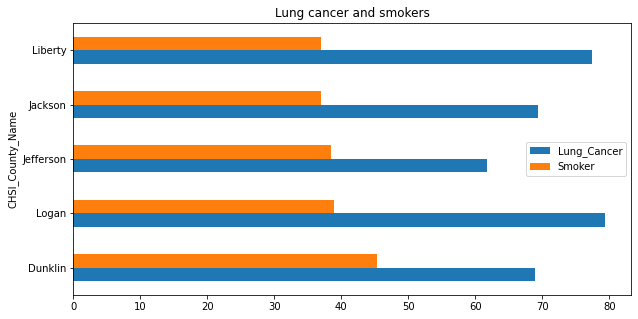

In [12]:
mask1999_2003 = measures_of_birth_and_death_tidy['MOBD_Time_Span'] == '1999-2003'
measures_of_birth_and_death_tidy_1994_2003 = measures_of_birth_and_death_tidy[mask1999_2003]
join_ex_4 = pd.merge(measures_of_birth_and_death_tidy_1994_2003, risk_factors_and_access_to_care_tidy,  how='left', left_on=['CHSI_State_Name','CHSI_County_Name'], right_on = ['CHSI_State_Name','CHSI_County_Name'])
targetColumnsJoin =  join_ex_4.loc[:, ('CHSI_State_Name', 'CHSI_County_Name', 'Lung_Cancer', 'Smoker')].sort_values(by=["Smoker"], ascending=False).head().set_index('CHSI_County_Name')
targetColumnsJoin.plot.barh(title= "Lung cancer and smokers", figsize=(10,5))

### Exercise 5

Plot the percentage of races that commit suicide in Bronx.

Result: We observe that the majority races are black and white.

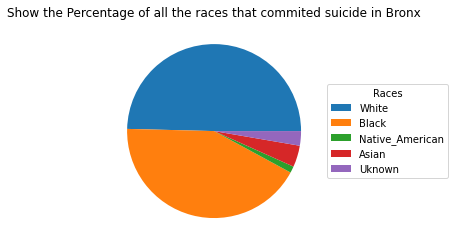

In [13]:
bronx_data_raw = demographics_tidy[demographics_tidy["CHSI_County_Name"] == "Bronx"]
bronx_data = bronx_data_raw.iloc[:,15:19]
bronx_tidy = bronx_data.loc[:,("White","Black","Native_American","Asian")].assign(Uknown = 100 - bronx_data.sum(axis=1))
plt.pyplot.pie(bronx_tidy.iloc[0])
plt.pyplot.title('Show the Percentage of all the races that commited suicide in Bronx')
plt.pyplot.legend(bronx_tidy.columns.values,title="Races",loc="center right",bbox_to_anchor=(1.1, 0, 0.5, 1))
plt.pyplot.show()

### Exercise 6

Compare the percentage of each race that are in the east and west coast.

Result: We can see that on the east coast there is a higher percentage of black population than on the west coast.

<AxesSubplot:title={'center':'Percentage of races in West Coast'}, xlabel='CHSI_State_Name'>

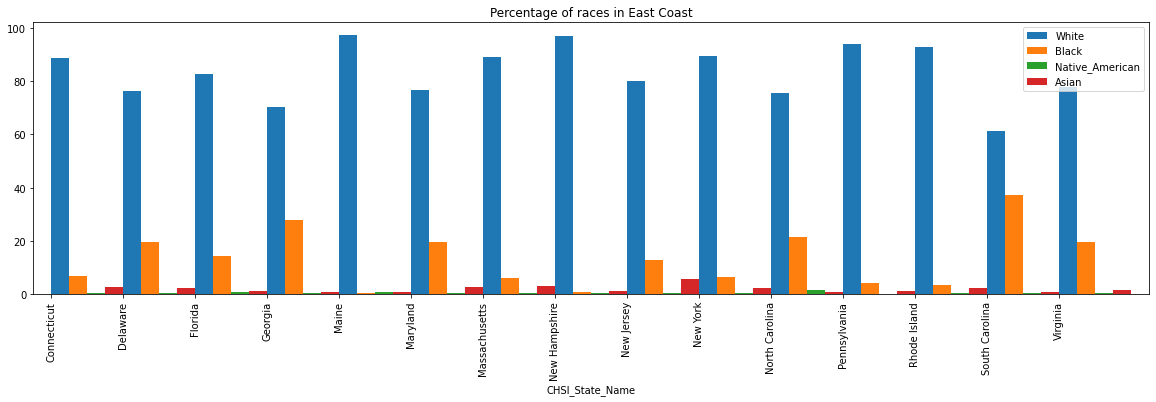

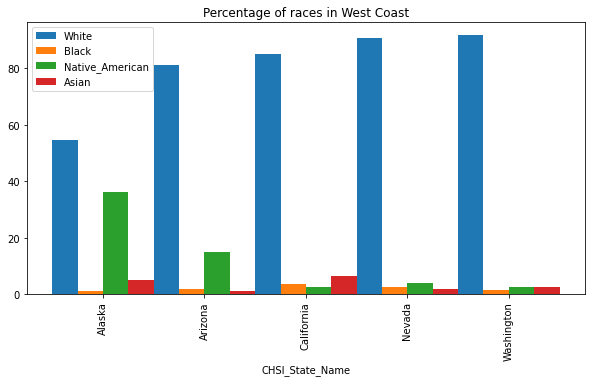

In [14]:
east_coast_state_name = ["Maine", "New Hampshire", "Massachusetts", "Rhode Island", "Connecticut", "New York", "New Jersey", "Pennsylvania", "Delaware", "Maryland", "Virginia", "North Carolina", "South Carolina", "Georgia", "Florida"]
west_coast_state_name = ["California", "Nevada", "Arizona", "Orlando", "Washington", "Alaska"]
targetColumns = ['CHSI_State_Name', 'White', 'Black', 'Native_American', 'Asian']
east_coast_state = demographics_tidy.loc[demographics_tidy['CHSI_State_Name'].isin(east_coast_state_name)]
west_coast_state = demographics_tidy.loc[demographics_tidy['CHSI_State_Name'].isin(west_coast_state_name)]
east_coast_states_race = east_coast_state[targetColumns].groupby(targetColumns[0]).agg({"White":"mean", "Black":"mean", "Native_American":"mean", "Asian":"mean"}).dropna().reset_index().set_index('CHSI_State_Name')
west_coast_states_race = west_coast_state[targetColumns].groupby(targetColumns[0]).agg({"White":"mean", "Black":"mean", "Native_American":"mean", "Asian":"mean"}).dropna().reset_index().set_index('CHSI_State_Name')
east_coast_states_race.plot.bar(title = "Percentage of races in East Coast", width=1, figsize=(20,5), align="edge")
west_coast_states_race.plot.bar(title = "Percentage of races in West Coast", width=1, figsize=(10,5))

### Exercise 7

Plot the states with most poverty and compare to its obesity rates.

Result: We have no evidence of causality as obesity is fairly uniform across states while poverty is much more variable.

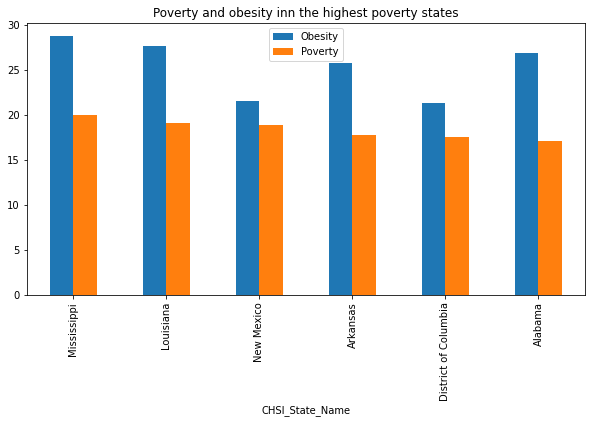

In [27]:
states_obesity = risk_factors_and_access_to_care_tidy.groupby("CHSI_State_Name")
states_obesity = states_obesity.agg({"Obesity":"mean"}).dropna()
states_population_size = demographics_tidy.groupby("CHSI_State_Name")
states_population_size = states_population_size.agg({"Poverty":"mean"}).dropna()
obestiy_and_poverty = states_obesity.join(states_population_size, on="CHSI_State_Name")
sorted_head_obestiy_and_poverty = obestiy_and_poverty.sort_values(by=["Poverty","Obesity"], ascending=False).head(6)
sorted_head_obestiy_and_poverty.plot.bar(title = "Poverty and obesity inn the highest poverty states" , figsize=(10,5))

### Exercise 8

How many counties exceed 20% of poverty and what are their names.

Result: We can see that the southern states are generally poorer than the northern ones.

In [5]:
states_poverty_raw = demographics_tidy.loc[:, ('CHSI_State_Name', 'State_FIPS_Code', 'Poverty')]
states_poverty_tidy = states_poverty_raw.groupby(["CHSI_State_Name", 'State_FIPS_Code'])
states_poverty_tidy = states_poverty_tidy.agg({"Poverty":"mean"}).dropna()
states_poverty_raw = demographics_tidy[['CHSI_State_Name','Poverty']]
states_poverty_tidy = states_poverty_raw.groupby("CHSI_State_Name")
states_poverty_tidy = states_poverty_tidy.agg({"Poverty":"mean"}).dropna()
data_usa = states_poverty_tidy.join(us_long_lat_state.set_index("City"), on="CHSI_State_Name").reset_index()
fig = go.Figure(data=go.Choropleth(
    locations=data_usa['State'], # Spatial coordinates
    z = data_usa['Poverty'].astype(float), # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Poverty percentage",
))

fig.update_layout(
    title_text = 'Poverty map of USA',
    geo_scope='usa', # limite map scope to USA
)

fig.show(renderer= "iframe")

### Exercise 9

Compare the richest and poorest counties by obesity and unemployment.

Result: We cannot draw any conclusions given the lack of data.

<AxesSubplot:title={'center':'The poorest countries'}, xlabel='CHSI_County_Name'>

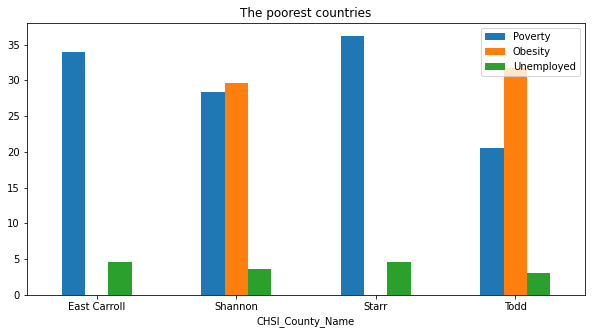

In [15]:
join_tables_exc9 = risk_factors_and_access_to_care_tidy.merge(demographics_tidy,left_on='CHSI_County_Name', right_on='CHSI_County_Name')
join_tables_exc9 = join_tables_exc9.merge(vulnerable_pops_and_env_health_tidy,left_on='CHSI_County_Name', right_on='CHSI_County_Name')
most_poverty_state = join_tables_exc9[["CHSI_County_Name","Population_Size","Obesity","Poverty","Unemployed"]]
sorted_head_most_poverty_state = most_poverty_state.sort_values(by="Poverty", ascending=False)
the_poorest = sorted_head_most_poverty_state["CHSI_County_Name"].unique()
name_of_poor_counties = the_poorest[0:4]
poor_states = sorted_head_most_poverty_state[sorted_head_most_poverty_state["CHSI_County_Name"].isin(name_of_poor_counties)]
table_format_most_poverty_state = poor_states.groupby("CHSI_County_Name").agg({"Poverty":"mean","Obesity":"mean","Unemployed":lambda unem : np.mean(unem/poor_states["Population_Size"])*100})
table_format_most_poverty_state.plot.bar(title="The poorest countries", rot= 0, figsize=(10,5))

<AxesSubplot:title={'center':'The riches states'}, xlabel='CHSI_County_Name'>

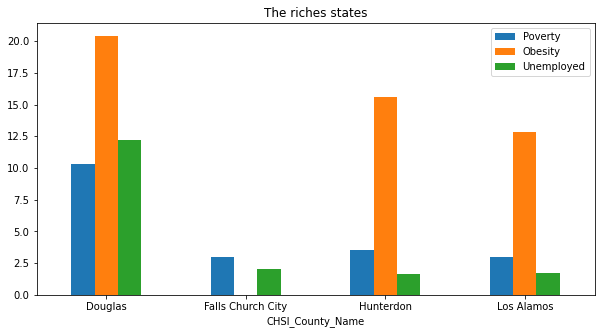

In [16]:
most_rich_state = join_tables_exc9[["CHSI_County_Name","Population_Size","Obesity","Poverty","Unemployed"]]
sorted_head_most_richest_states = most_rich_state.sort_values(by="Poverty")
the_richest_ones = sorted_head_most_richest_states["CHSI_County_Name"].unique()
name_richest_states = the_richest_ones[0:4]
most_rich_states = sorted_head_most_richest_states[sorted_head_most_richest_states["CHSI_County_Name"].isin(name_richest_states)]
table_format_most_rich_state = most_rich_states.groupby("CHSI_County_Name").agg({"Poverty":"mean","Obesity":"mean","Unemployed":lambda unem : np.mean(unem/most_rich_states["Population_Size"])*100})
table_format_most_rich_state.plot.bar(title= "The riches states", rot= 0, figsize=(10,5))

### Exercise 10

Compare the number of patients with Hepatitis A and B with the level of the population without health insurance.

Result: Causation cannot be established because a county like Fulton with very few insured has practically the same number of Hepatitis A and B patients.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d133a9dc0>,
      dtype=object)

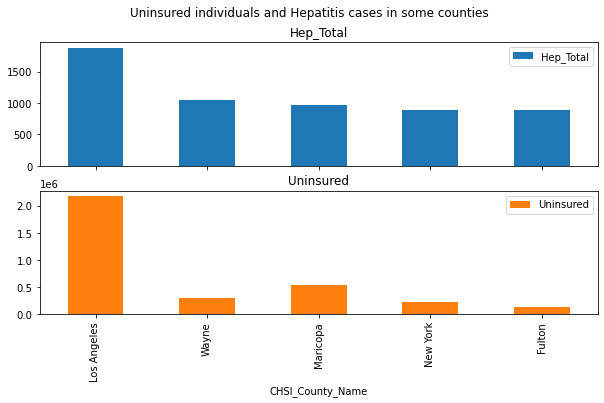

In [31]:
hepatits_a_and_b = preventive_services_use_tidy.loc[:, ('CHSI_County_Name', 'CHSI_State_Name', 'HepA_Rpt', 'HepB_Rpt')].assign(Hep_Total = preventive_services_use_tidy['HepA_Rpt'] + preventive_services_use_tidy['HepB_Rpt']).loc[:, ('CHSI_County_Name', 'CHSI_State_Name', 'Hep_Total')].sort_values(by=["Hep_Total"], ascending=False).head()
uninsured = risk_factors_and_access_to_care_tidy.loc[:, ('CHSI_State_Name', 'CHSI_County_Name', 'Uninsured')]
hepatitis_and_uninsured = pd.merge(hepatits_a_and_b, uninsured,  how='left', left_on=['CHSI_State_Name','CHSI_County_Name'], right_on = ['CHSI_State_Name','CHSI_County_Name'])
hepatitis_and_uninsured = hepatitis_and_uninsured.loc[:, hepatitis_and_uninsured.columns != 'CHSI_State_Name'].set_index('CHSI_County_Name')
hepatitis_and_uninsured.plot.bar(title= 'Uninsured individuals and Hepatitis cases in some counties', subplots=True, figsize=(10,5))